In [1]:
import pandas as pd

df = pd.read_csv(r"F:/GUVI/guvi 2 project/ICRISAT-District Level Data.csv")

df.dropna(inplace=True)  # Keep only if your dataset has important missing values
df.drop_duplicates(inplace=True)

df.to_csv("cleaned_agriculture_data.csv", index=False)

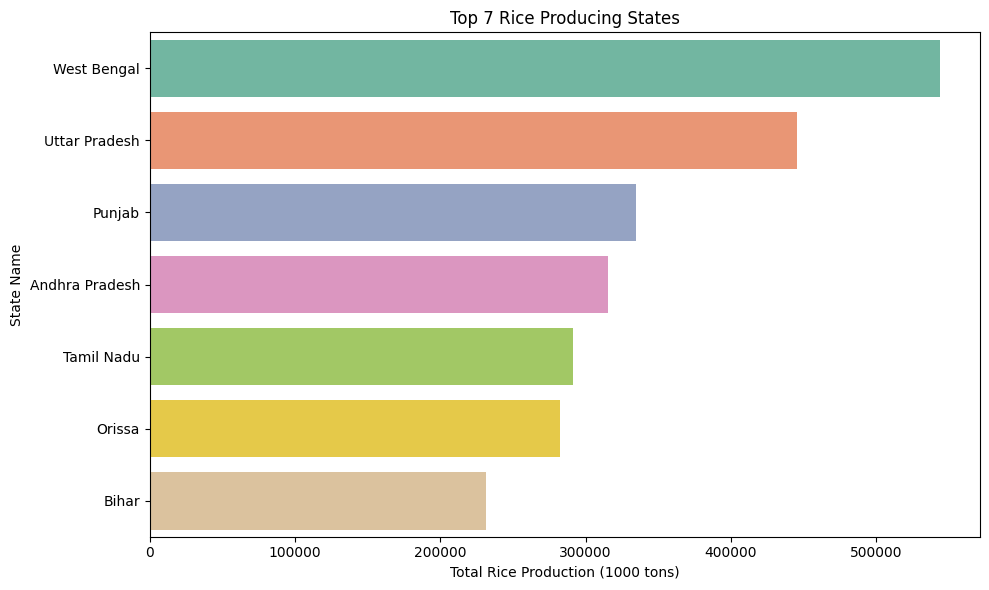

In [ ]:
pip install 
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
rice_by_state = df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
rice_df = rice_by_state.reset_index()
rice_df.columns = ['State Name', 'Rice Production']

# Step 2: Plot with hue to avoid warning
plt.figure(figsize=(10,6))
sns.barplot(
    data=rice_df,
    x="Rice Production",
    y="State Name",
    hue="State Name",          
    palette="Set2",            # 🎨 Choose your favorite palette (e.g., Set2, Set1, Blues_d)
    dodge=False,               # ✅ To keep bars in a single line (not side-by-side)
    legend=False               # 🧾 Optional: hide the legend if y-axis already has state names
)
plt.title("Top 7 Rice Producing States")
plt.xlabel("Total Rice Production (1000 tons)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()


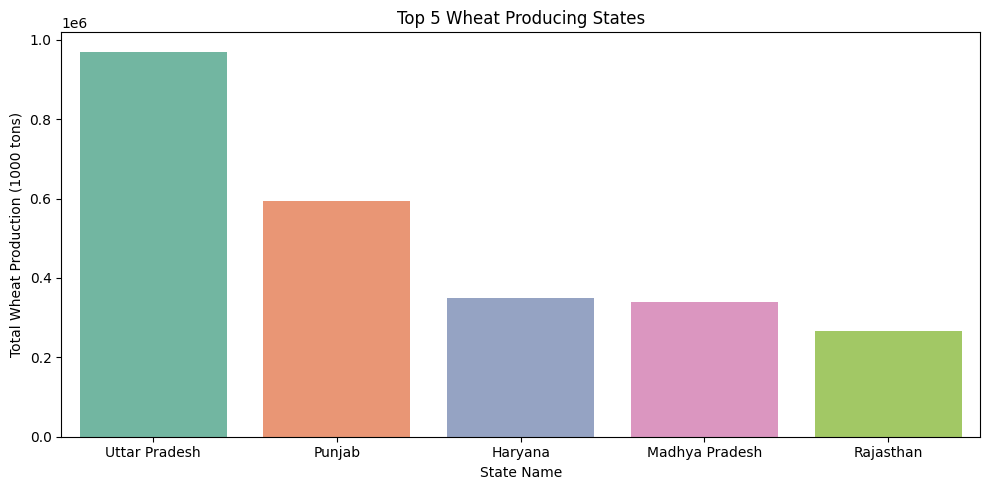

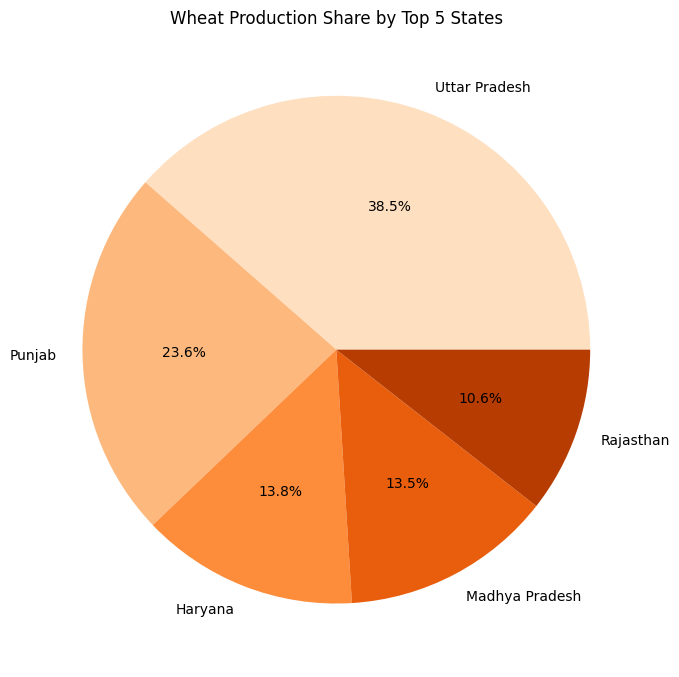

In [4]:
#2)Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
# Prepare data
wheat_by_state = df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)
wheat_df = wheat_by_state.reset_index()
wheat_df.columns = ['State Name', 'Wheat Production']

# Plot Bar Chart without triggering warning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=wheat_df,
    x='State Name',
    y='Wheat Production',
    hue='State Name',               # Add hue = x variable
    palette="Set2",
    legend=False                    # Hide redundant color legend
)
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Total Wheat Production (1000 tons)")
plt.xlabel("State Name")
plt.tight_layout()
plt.show()

#2)its percentage(%)(Pie_chart)

# Pie chart for percentage
plt.figure(figsize=(7,7))
plt.pie(
    wheat_df["Wheat Production"],
    labels=wheat_df["State Name"],
    autopct='%1.1f%%',
    colors=sns.color_palette("Oranges", len(wheat_df))
)
plt.title("Wheat Production Share by Top 5 States")
plt.tight_layout()
plt.show()





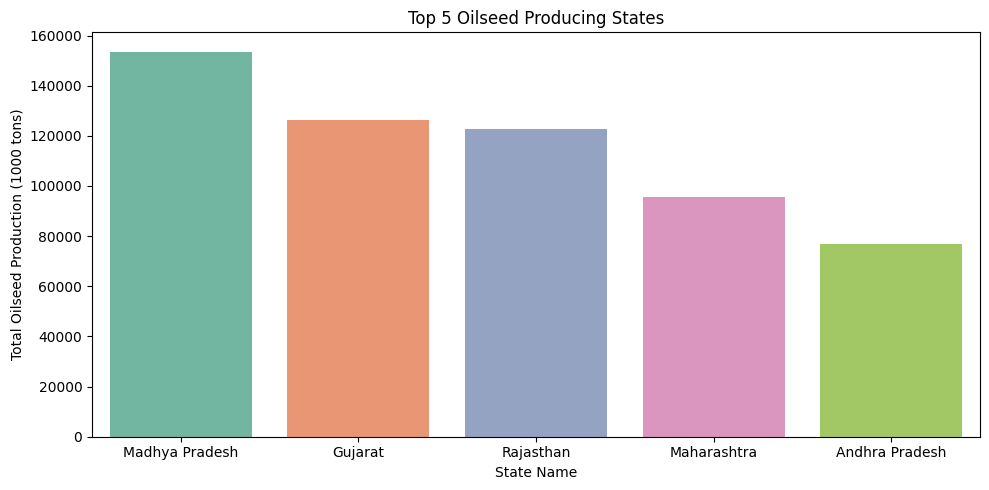

In [5]:
#3)Oilseed Production by Top 5 States 

# Step 1: Prepare the data
oilseed_by_state = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)

# Convert to DataFrame
oilseed_df = oilseed_by_state.reset_index()
oilseed_df.columns = ['State Name', 'Oilseed Production']

# Step 2: Plot bar chart with proper hue
plt.figure(figsize=(10, 5))
sns.barplot(
    data=oilseed_df,
    x='State Name',
    y='Oilseed Production',
    hue='State Name',
    palette="Set2",
    legend=False
)
plt.title("Top 5 Oilseed Producing States")
plt.ylabel("Total Oilseed Production (1000 tons)")
plt.xlabel("State Name")
plt.tight_layout()
plt.show()


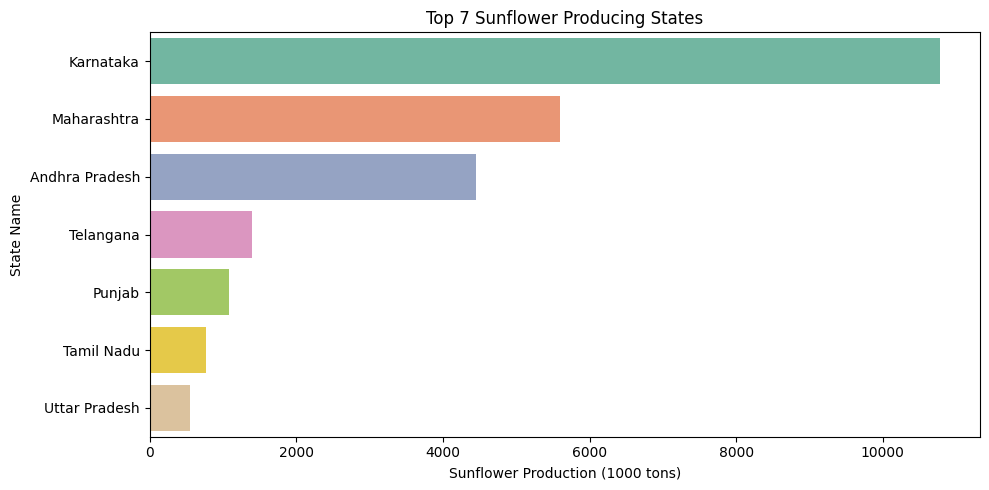

In [6]:
# 4)Top 7 SUNFLOWER PRODUCTION States (Warning-Free Version)

# Step 1: Group and prepare data
sunflower_by_state = df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)

# Step 2: Convert Series to DataFrame
sunflower_df = sunflower_by_state.reset_index()
sunflower_df.columns = ['State Name', 'Sunflower Production']

# Step 3: Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(
    data=sunflower_df,
    x='Sunflower Production',
    y='State Name',
    hue='State Name',            # Required to allow palette
    palette="Set2",
    legend=False                 # Hides duplicate color legend
)
plt.title("Top 7 Sunflower Producing States")
plt.xlabel("Sunflower Production (1000 tons)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()

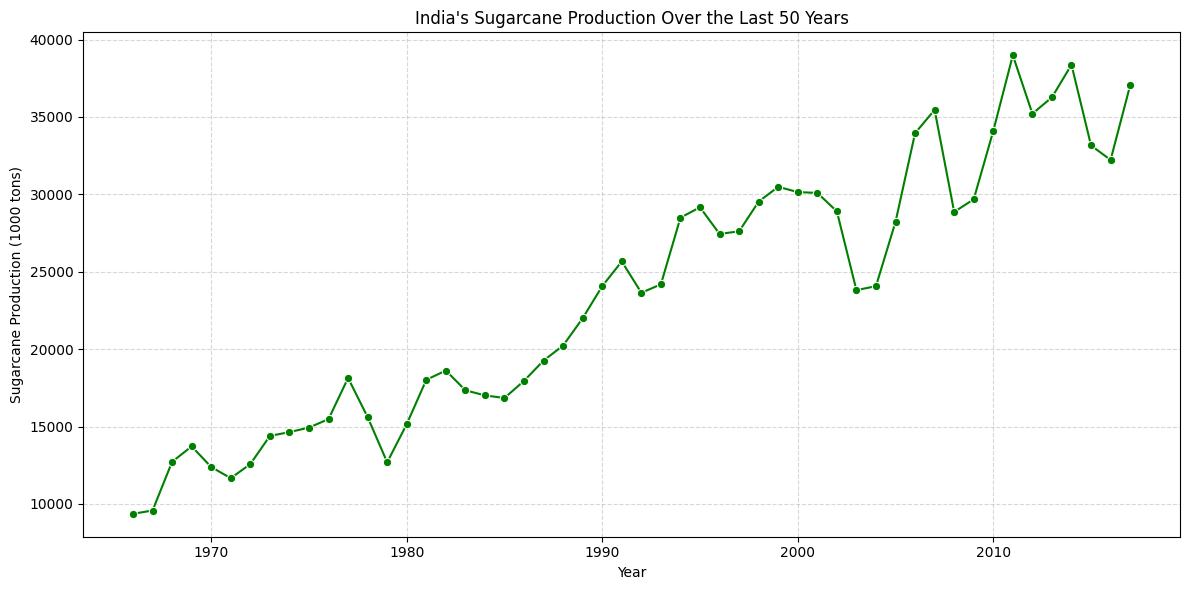

In [7]:
#5)India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot) 

sugarcane_by_year = df.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sugarcane_by_year, x="Year", y="SUGARCANE PRODUCTION (1000 tons)", marker='o', color='green')
plt.title("India's Sugarcane Production Over the Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


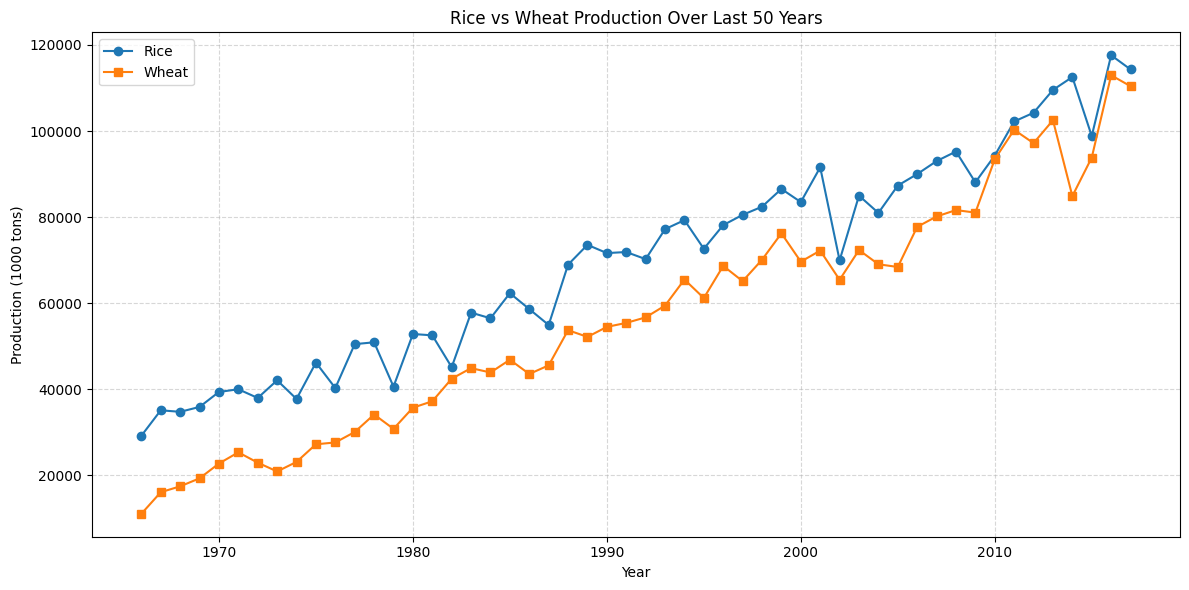

In [8]:
#6)Rice Production Vs Wheat Production (Last 50y)

prod_by_year = df.groupby("Year")[["RICE PRODUCTION (1000 tons)", "WHEAT PRODUCTION (1000 tons)"]].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(prod_by_year["Year"], prod_by_year["RICE PRODUCTION (1000 tons)"], label="Rice", marker='o')
plt.plot(prod_by_year["Year"], prod_by_year["WHEAT PRODUCTION (1000 tons)"], label="Wheat", marker='s')
plt.title("Rice vs Wheat Production Over Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


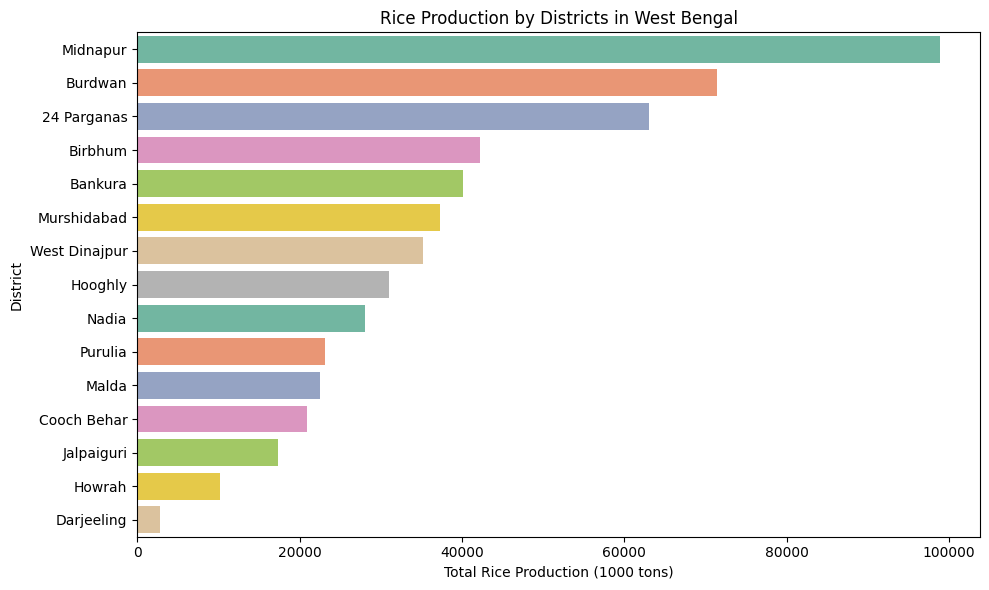

In [5]:
#7)Rice Production By West Bengal Districts

# Filter and group data
west_bengal = df[df["State Name"] == "West Bengal"]
wb_rice = west_bengal.groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False)

# Convert to DataFrame
wb_rice_df = wb_rice.reset_index()
wb_rice_df.columns = ["Dist Name", "Rice Production"]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=wb_rice_df,
    x="Rice Production",
    y="Dist Name",
    hue="Dist Name",              # Add hue to allow palette safely
    palette="Set2",
    legend=False
)
plt.title("Rice Production by Districts in West Bengal")
plt.xlabel("Total Rice Production (1000 tons)")
plt.ylabel("District")
plt.tight_layout()
plt.show()



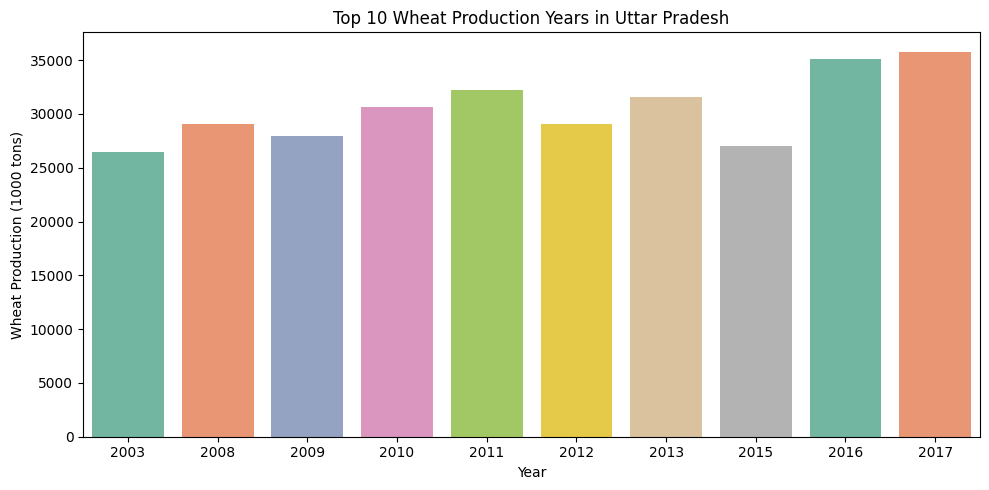

In [6]:
#8)Top 10 Wheat Production Years From UP 

# Filter and group the data
up = df[df["State Name"] == "Uttar Pradesh"]
up_wheat = up.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame
up_wheat_df = up_wheat.reset_index()
up_wheat_df.columns = ["Year", "Wheat Production"]

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=up_wheat_df,
    x="Year",
    y="Wheat Production",
    hue="Year",               # Assign hue to avoid warning
    palette="Set2",
    legend=False              # Hide the hue legend (years already on x-axis)
)
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.tight_layout()
plt.show()


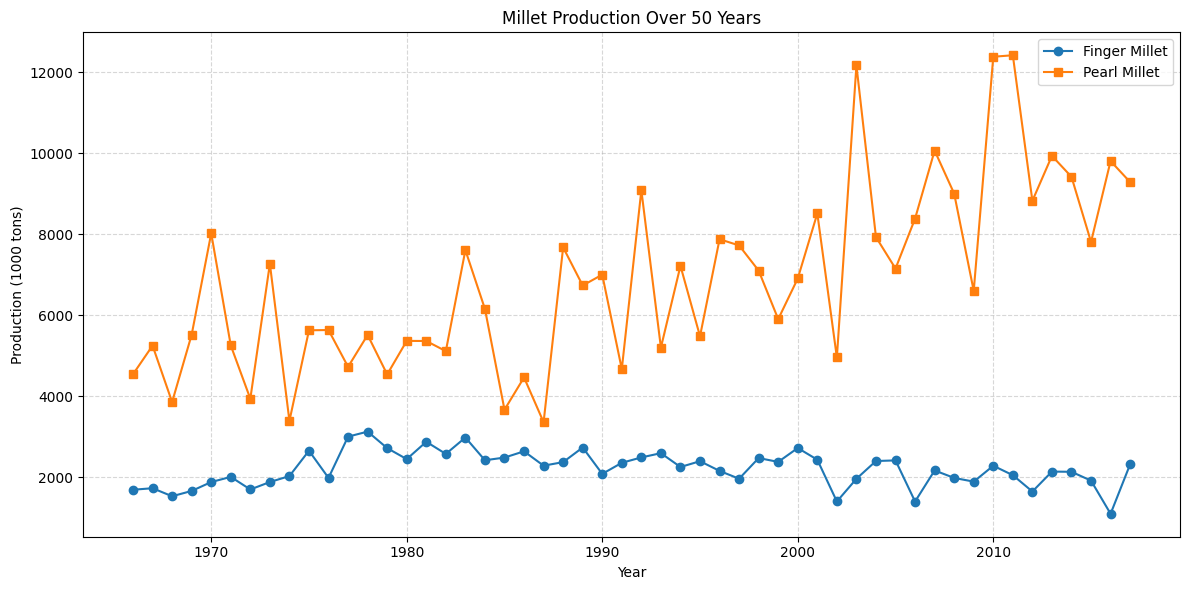

In [7]:
#9)Millet Production (Last 50y)

millet_by_year = df.groupby("Year")[["FINGER MILLET PRODUCTION (1000 tons)", "PEARL MILLET PRODUCTION (1000 tons)"]].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(millet_by_year["Year"], millet_by_year["FINGER MILLET PRODUCTION (1000 tons)"], label="Finger Millet", marker='o')
plt.plot(millet_by_year["Year"], millet_by_year["PEARL MILLET PRODUCTION (1000 tons)"], label="Pearl Millet", marker='s')
plt.title("Millet Production Over 50 Years")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


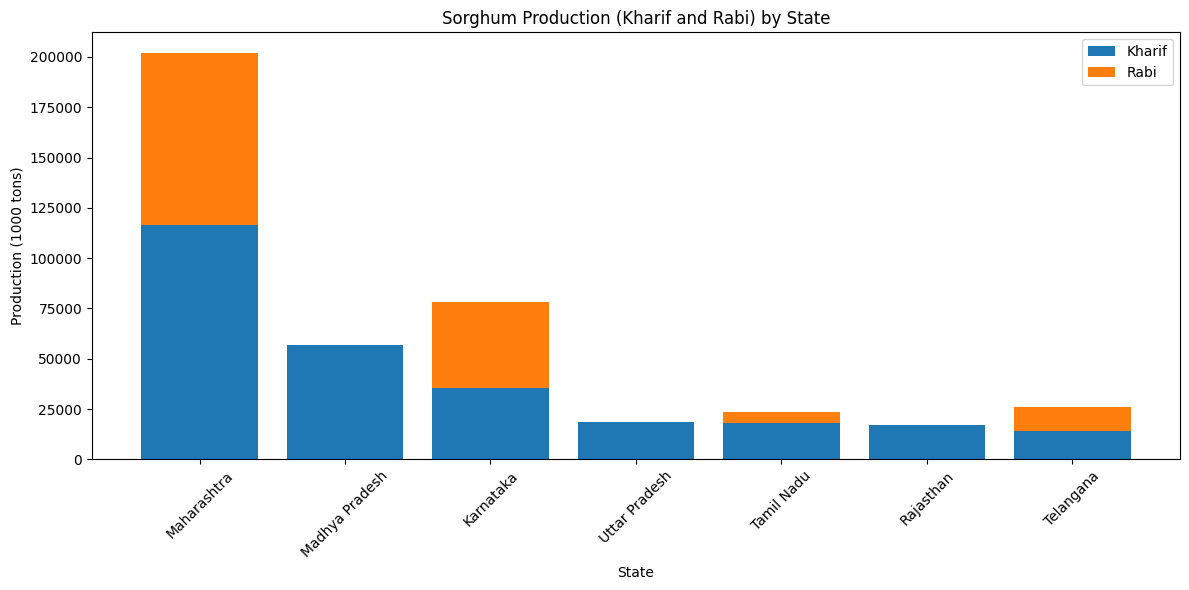

In [8]:
#10)Sorghum Production (Kharif and Rabi) by Region 

sorghum_by_state = df.groupby("State Name")[["KHARIF SORGHUM PRODUCTION (1000 tons)", "RABI SORGHUM PRODUCTION (1000 tons)"]].sum().reset_index()
sorghum_by_state = sorghum_by_state.sort_values(by="KHARIF SORGHUM PRODUCTION (1000 tons)", ascending=False).head(7)

plt.figure(figsize=(12,6))
bar1 = plt.bar(sorghum_by_state["State Name"], sorghum_by_state["KHARIF SORGHUM PRODUCTION (1000 tons)"], label="Kharif")
bar2 = plt.bar(sorghum_by_state["State Name"], sorghum_by_state["RABI SORGHUM PRODUCTION (1000 tons)"], bottom=sorghum_by_state["KHARIF SORGHUM PRODUCTION (1000 tons)"], label="Rabi")
plt.title("Sorghum Production (Kharif and Rabi) by State")
plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


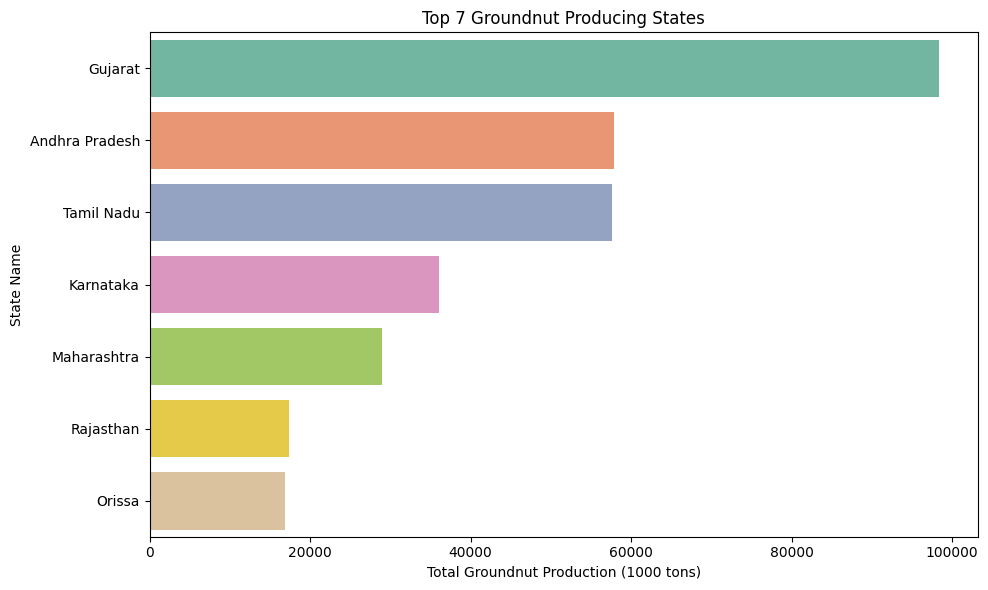

In [10]:
#11)Top 7 States for Groundnut Production 

# Group and get top 7 states by total groundnut production
groundnut_by_state = df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)

# Convert to DataFrame
groundnut_df = groundnut_by_state.reset_index()
groundnut_df.columns = ['State Name', 'Groundnut Production']

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=groundnut_df, x="Groundnut Production", y="State Name", hue="State Name", palette="Set2", legend=False)
plt.title("Top 7 Groundnut Producing States")
plt.xlabel("Total Groundnut Production (1000 tons)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()


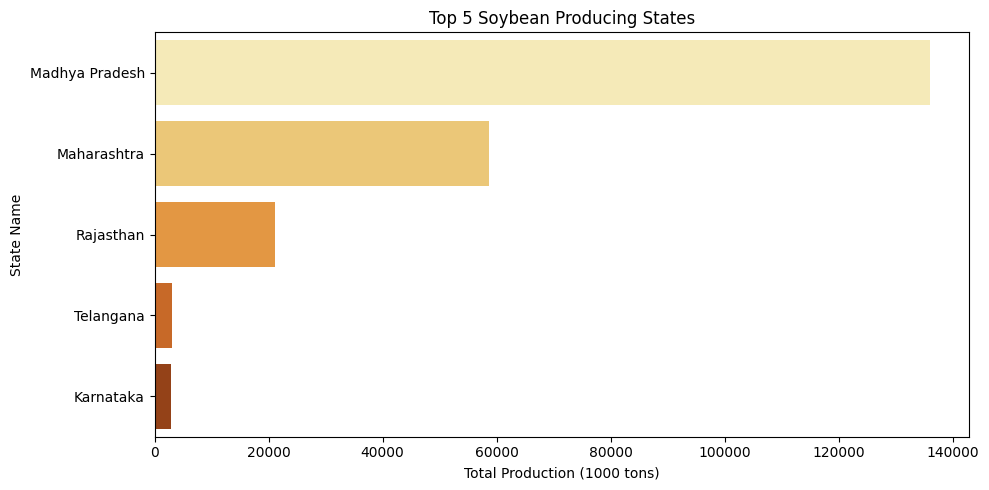

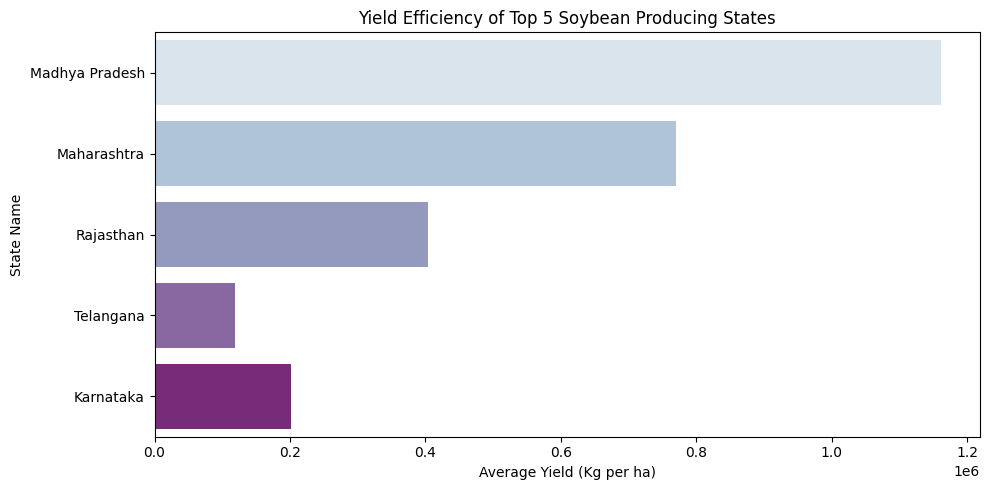

In [11]:
#12)Soybean Production by Top 5 States and Yield Efficiency
# Calculate total soybean production and yield by state
soybean_prod = df.groupby("State Name")[["SOYABEAN PRODUCTION (1000 tons)", "SOYABEAN YIELD (Kg per ha)"]].sum()
soybean_top5 = soybean_prod.sort_values(by="SOYABEAN PRODUCTION (1000 tons)", ascending=False).head(5).reset_index()

# Bar Chart for Production
plt.figure(figsize=(10,5))
sns.barplot(data=soybean_top5, x="SOYABEAN PRODUCTION (1000 tons)", y="State Name", hue="State Name", palette="YlOrBr", legend=False)
plt.title("Top 5 Soybean Producing States")
plt.xlabel("Total Production (1000 tons)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()

# Bar Chart for Yield
plt.figure(figsize=(10,5))
sns.barplot(data=soybean_top5, x="SOYABEAN YIELD (Kg per ha)", y="State Name", hue="State Name", palette="BuPu", legend=False)
plt.title("Yield Efficiency of Top 5 Soybean Producing States")
plt.xlabel("Average Yield (Kg per ha)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()


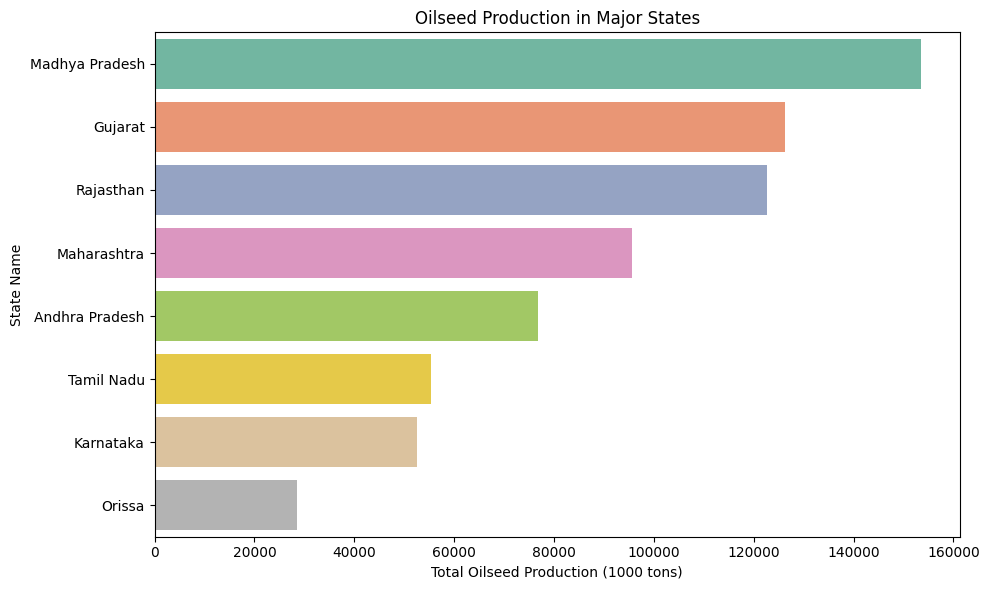

In [12]:
#13)Oilseed Production in Major States 

# Group and get top 8 states by total oilseed production
oilseed_by_state = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(8)

# Convert to DataFrame
oilseed_df = oilseed_by_state.reset_index()
oilseed_df.columns = ['State Name', 'Oilseed Production']

# Horizontal Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(data=oilseed_df, x="Oilseed Production", y="State Name", hue="State Name", palette="Set2", legend=False)
plt.title("Oilseed Production in Major States")
plt.xlabel("Total Oilseed Production (1000 tons)")
plt.ylabel("State Name")
plt.tight_layout()
plt.show()


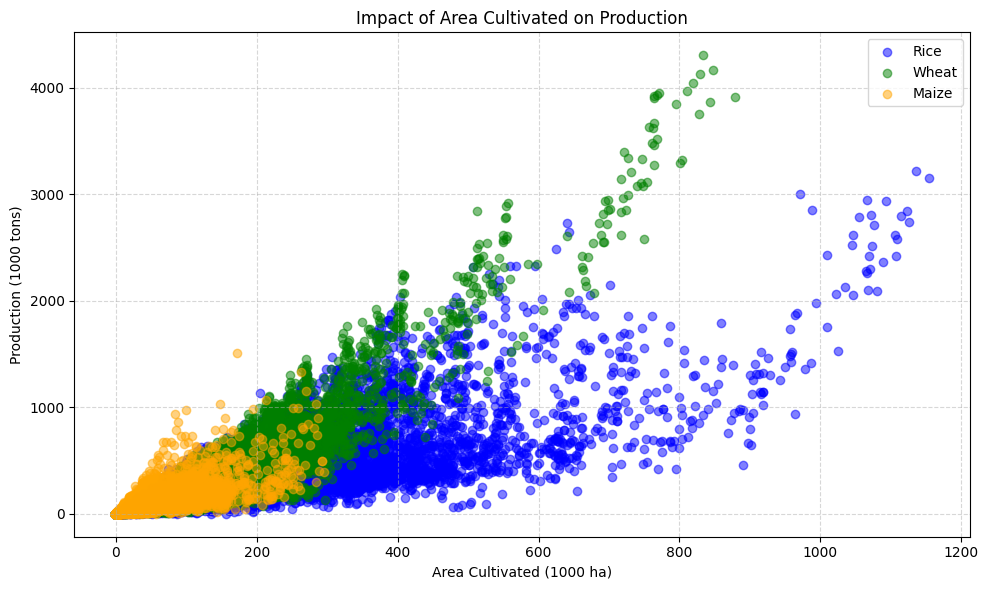

In [13]:
#14)Impact of Area Cultivated on Production (Rice, Wheat, Maize)

# Create scatter plots for Area vs Production
plt.figure(figsize=(10,6))
plt.scatter(df["RICE AREA (1000 ha)"], df["RICE PRODUCTION (1000 tons)"], color='blue', alpha=0.5, label="Rice")
plt.scatter(df["WHEAT AREA (1000 ha)"], df["WHEAT PRODUCTION (1000 tons)"], color='green', alpha=0.5, label="Wheat")
plt.scatter(df["MAIZE AREA (1000 ha)"], df["MAIZE PRODUCTION (1000 tons)"], color='orange', alpha=0.5, label="Maize")
plt.title("Impact of Area Cultivated on Production")
plt.xlabel("Area Cultivated (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

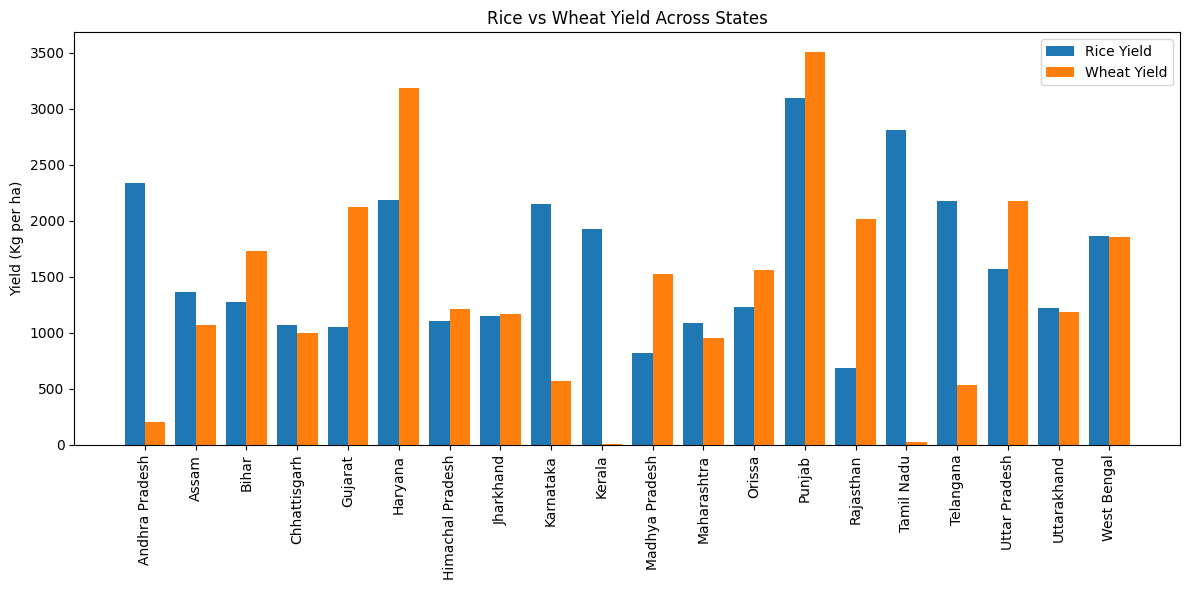

In [5]:
#15)Rice vs. Wheat Yield Across States

# Group by state and average the yields
yield_by_state = df.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]].mean().reset_index()

# Bar Plot
plt.figure(figsize=(12,6))
x = range(len(yield_by_state))
plt.bar(x, yield_by_state["RICE YIELD (Kg per ha)"], width=0.4, label="Rice Yield", align='center')
plt.bar([i + 0.4 for i in x], yield_by_state["WHEAT YIELD (Kg per ha)"], width=0.4, label="Wheat Yield", align='center')
plt.xticks([i + 0.2 for i in x], yield_by_state["State Name"], rotation=90)
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.legend()
plt.tight_layout()
plt.show()
